In [1]:
import blocksci
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
import networkx as nx


In [2]:
chain = blocksci.Blockchain("./bitcoin-data/")

In [3]:
#clustering
peeling_and_legacy = blocksci.heuristics.change.peeling_chain()
cm = blocksci.cluster.ClusterManager.create_clustering("./peeling_modify12",chain,peeling_and_legacy,True)

99.99% done


In [9]:
heur = blocksci.heuristics.change.address_reuse().__sub__(blocksci.heuristics.change.peeling_chain())
cm = blocksci.cluster.ClusterManager.create_clustering("./composition_cluster5/",chain,heur,True)

99.99% done


In [12]:
cm_no_change = blocksci.cluster.ClusterManager("./bitcoin-cluster/",chain)

In [7]:
a = blocksci.heuristics.change.address_reuse().__call__(chain.tx_with_hash('0c0fbd1e7094865df9b0e5f1252c4c4f058fac7ba3c79bca77ad82c617cc96b9'))

In [8]:
a

set()

In [5]:
#clustering with locktime
#locktime = blocksci.heuristics.change.locktime()
#cm = blocksci.cluster.ClusterManager.create_clustering("./lockti",chain,locktime,True)

In [6]:
#clustering with address_type
#address_type = blocksci.heuristics.change.address_type()
#cm = blocksci.cluster.ClusterManager.create_clustering("./address_type_cluster",chain,address_type,True)

In [4]:
#clustering data read
cm_no_chain = blocksci.cluster.ClusterManager("./modify_cluster/",chain)
#cm_locktime = blocksci.cluster.ClusterManager("./locktime_cluster/",chain)
#cm_address_type = blocksci.cluster.ClusterManager("./address_type_cluster/",chain)

In [5]:
address = chain.address_from_string("1BhrNoLRT62o3vdUnXDm62hBpa55goQC8h")
#1BhrNoLRT62o3vdUnXDm62hBpa55goQC8h Bitthumb

In [9]:
cluster_no_change_with_address = cm_no_chain.cluster_with_address(address)
cluster_locktime_with_address = cm_locktime.cluster_with_address(address)
cluster_address_type_with_address = cm_address_type.cluster_with_address(address)

NameError: name 'cm_locktime' is not defined

In [5]:
clusters_no_change = cm_no_chain.clusters()
#clusters_locktime = cm_locktime.clusters()
#clusters_address_type = cm_address_type.clusters()

In [11]:
clusters_no_change[0]

In [12]:
a = 0
for i in x:
    if i > 100000000:
        print(a)
    a = a+1

NameError: name 'x' is not defined

In [13]:
max(x)

NameError: name 'x' is not defined

In [14]:
#plt.plot(clusters_no_change.size(),clusters_no_change.count(clusters_no_change.size()))

In [ ]:
#np.set_printoptions(suppress=True)
np_no_change = clusters_no_change.size()

In [6]:
np.save('./no_change_cluster_size.npy',np_no_change)

In [4]:
x = np.load('./no_change_cluster_size.npy')

In [ ]:
x == np_no_change

In [ ]:
np.count_nonzero(np_no_change == 1)

In [ ]:
np_no_change

In [19]:
max(np_no_change)

12075665

In [7]:
np_no_change_zero = np.zeros(max(np_no_change)+1)
for change in np_no_change:
    np_no_change_zero[change] += 1

In [8]:
np_no_change_cumsum = np.cumsum(np_no_change_zero)
np_no_change_cdf = [value/np_no_change_cumsum[-1] for value in np_no_change_cumsum]

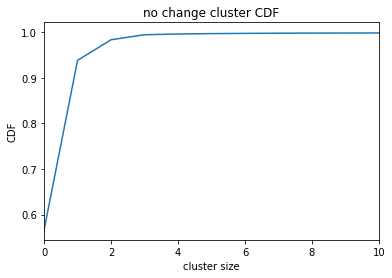

In [12]:
plt.plot(np_no_change_cdf)
plt.xlim(0, 10)
plt.xlabel("cluster size")
plt.ylabel("CDF")
plt.title("no change cluster CDF")
plt.show() 

In [ ]:
np_locktime = clusters_locktime.type_equiv_size

In [ ]:
rv = sp.stats.norm(loc=1, scale=2)

In [ ]:
H,X1 = np.histogram( np_no_change, bins = np_no_change.size, normed = True )


In [ ]:
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
#method 2
X2 = np.sort(np_no_change)
F2 = np.array(range(np_no_change.size))/float(np_no_change.size)

plt.plot(X1[1:], F1)
plt.plot(X2, F2)
plt.show()

In [ ]:
cdf = rv.cdf(np_no_change)
plt.plot(np_no_change,cdf)
plt.xlabel("cluster size")
plt.ylabel("number of cluster")
plt.title("no change cluster")
plt.show() 

In [ ]:
np_locktime = clusters_locktime.type_equiv_size

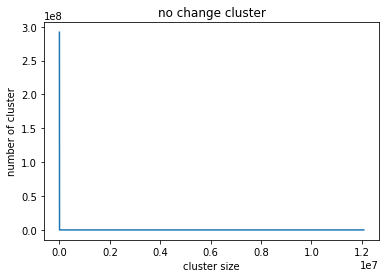

In [18]:
plt.plot(np_no_change_zero)
plt.xlabel("cluster size")
plt.ylabel("number of cluster")
plt.title("no change cluster")
plt.show() 

In [ ]:
np_address_type = clusters_address_type.type_equiv_size

MemoryError: 

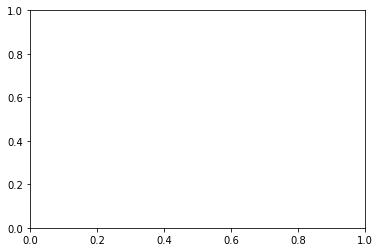

In [16]:
plt.plot(np_no_change)
plt.xlabel("cluster size")
plt.ylabel("number of cluster")
plt.title("address type cluster")
plt.show() 

In [ ]:
clusters_address_type.type_equiv_size

In [ ]:
clusters_locktime.type_equiv_size

In [ ]:
plt.plot(np_no_change)

In [ ]:
np_no_change = clusters_no_change.count_of_type(blocksci.address_type.pubkey) + clusters_no_change.count_of_type(blocksci.address_type.pubkeyhash)

In [ ]:
#sum(1 for _ in cm_no_chain.clusters().addresses)
#len(list(cm_no_chain.clusters().addresses))

In [ ]:
plt.subplots_adjust(hspace=0.4)
t = np.arange(0.01, 20.0, 0.01)

# log y axis
plt.subplot(221)
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

# log x axis
plt.subplot(222)
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)

# log x and y axis
plt.subplot(223)
plt.loglog(t, 20*np.exp(-t/10.0), basex=2)
plt.grid(True)
plt.title('loglog base 2 on x')

# with errorbars: clip non-positive values
ax = plt.subplot(224)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0
plt.errorbar(x, y, xerr=0.1*x, yerr=5.0 + 0.75*y)
ax.set_ylim(ymin=0.1)
ax.set_title('Errorbars go negative')


plt.show()

In [ ]:
x1 = sorted(x)

In [ ]:
plt.plot(x1)

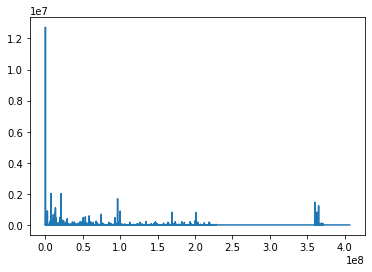

In [4]:
plt.plot(x)

In [4]:
np_no_change_zero = np.zeros(max(x)+1)
for change in x:
    np_no_change_zero[change] += 1

/home/dnlab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


([<matplotlib.axis.YTick at 0x7fcfe76827f0>,
 <a list of 10 Text yticklabel objects>)

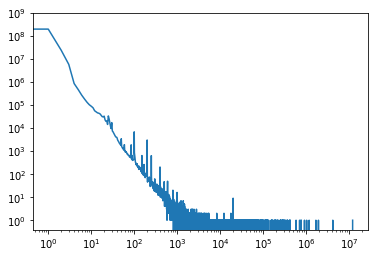

In [20]:
plt.loglog(np_no_change_zero,basey=10)
plt.ylim(0, 10**9)
plt.yticks([10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9])

In [21]:
np_no_change_zero[1]

191729662.0

In [24]:
sum_x = 0
for i in range(20000,max(np_no_change)):
    sum_x = sum_x+np_no_change_zero[i]

In [25]:
sum_x

221.0

In [13]:
len(np_no_change_zero)

15648686

In [1]:
for i in np_no_change_zero:
    print(i)

NameError: name 'np_no_change_zero' is not defined

In [23]:
sum_x = 0
for i in np_no_change_zero:
    if i > 20000:
        sum_x = sum_x+1
        print(i)

248476785.0
124379265.0
22553210.0
5350387.0
2157636.0
1098899.0
609099.0
382262.0
266955.0
201751.0
172227.0
150873.0
92695.0
80081.0
70347.0
65037.0
60068.0
52948.0
45709.0
43719.0
44915.0
33314.0
28905.0
28964.0
22269.0
40398.0
31552.0
23290.0
21838.0


In [24]:
sum_x

29

In [13]:
address_thumb = chain.address_from_string("1BhrNoLRT62o3vdUnXDm62hBpa55goQC8h") #  빗썸
address_coinone = chain.address_from_string("39xgGogxeL5HXCaBMuxJRjQDxiRQ9DZYgm") #코인원 
address_korbit = chain.address_from_string("13DdfKxdExuucK3XigjubTrrUWxkEQxYpm") #코빗
address_upbit = chain.address_from_string("3GDgbaYyoKyY1qc369FhoiqxRCBi9aaHNM")#업비트

In [14]:
cluster_no_change_with_address_thumb = cm_no_change.cluster_with_address(address_thumb)
cluster_no_change_with_address_coinone = cm_no_change.cluster_with_address(address_coinone)
cluster_no_change_with_address_korbit = cm_no_change.cluster_with_address(address_korbit)
cluster_no_change_with_address_upbit = cm_no_change.cluster_with_address(address_upbit)

In [15]:
cluster_no_change_with_address_thumb.size()

263707302